<h1>Manipulating the data for model building (Classifer)</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pylab import rcParams
from io import StringIO
import re
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#Reading the cleaned and merged dataset
df= pd.read_csv("mergedData.csv")

In [3]:
df.head()

,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions,Last TXN Amount,Merchant Code,Last Transaction Narrative,Loan Flag
0,1,36,1,cork,10001-40000,58,4,1,0.0,NaN,NaN,NaN,0
1,2,43,1,cavan,0-10000,2663,4,0,17.0,83.66,7211.0,THE BRIDGE LAUNDRY WICKLOW TOWN,0
2,3,32,0,dublin,10001-40000,46,2,0,25.0,526.18,3667.0,LUXOR HOTEL/CASINO LAS VEGAS NV,0
3,4,52,1,louth,40001-60000,0,2,1,13.0,70.68,5712.0,HARVEY NORMAN CARRICKMINES,0
4,5,63,0,kilkenny,60001-100000,126,1,0,39.0,259.07,5999.0,PAYPAL *PETEWOODWAR 35314369001,0


In [4]:
#Checking for null vlaues
df.isnull().sum()

Client ID                           0
Age                                 0
Gender                              0
County                             28
Income Group                        0
Average_CA_transaction_amount       0
No_of_products_held                 0
Held Loan previously                0
Num Transactions                    0
Last TXN Amount                  3278
Merchant Code                    3278
Last Transaction Narrative       3278
Loan Flag                           0
dtype: int64

In [5]:
#Too Many null values in the last 3 columns , hence deleting those columns for now
df.drop("Last TXN Amount", axis =1, inplace = True)
df.drop("Merchant Code", axis =1, inplace = True)
df.drop("Last Transaction Narrative", axis =1, inplace = True)

In [6]:
df.head()

,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions,Loan Flag
0,1,36,1,cork,10001-40000,58,4,1,0.0,0
1,2,43,1,cavan,0-10000,2663,4,0,17.0,0
2,3,32,0,dublin,10001-40000,46,2,0,25.0,0
3,4,52,1,louth,40001-60000,0,2,1,13.0,0
4,5,63,0,kilkenny,60001-100000,126,1,0,39.0,0


In [7]:
#Rearranging the columns for better access
df = df[['Loan Flag','Client ID','Age','Gender','County','Income Group','Average_CA_transaction_amount','No_of_products_held','Held Loan previously','Num Transactions']]

In [8]:
df.head()

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions
0,0,1,36,1,cork,10001-40000,58,4,1,0.0
1,0,2,43,1,cavan,0-10000,2663,4,0,17.0
2,0,3,32,0,dublin,10001-40000,46,2,0,25.0
3,0,4,52,1,louth,40001-60000,0,2,1,13.0
4,0,5,63,0,kilkenny,60001-100000,126,1,0,39.0


In [9]:
df.describe()

,Loan Flag,Client ID,Age,Gender,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.021100,5000.50000,44.347000,0.509000,444.829200,3.002700,0.249800,18.292900
std,0.143725,2886.89568,14.849857,0.499944,877.434779,1.410068,0.432919,22.962819
min,0.000000,1.00000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2500.75000,32.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,0.000000,5000.50000,44.000000,1.000000,30.000000,3.000000,0.000000,10.000000
75%,0.000000,7500.25000,57.000000,1.000000,402.000000,4.000000,0.000000,30.000000
max,1.000000,10000.00000,100.000000,1.000000,9470.000000,5.000000,1.000000,100.000000


In [10]:
#Filling the Null values with None for County column
df.fillna("None", inplace = True)

In [11]:
#No more null vlaues
df.isnull().sum()

Loan Flag                        0
Client ID                        0
Age                              0
Gender                           0
County                           0
Income Group                     0
Average_CA_transaction_amount    0
No_of_products_held              0
Held Loan previously             0
Num Transactions                 0
dtype: int64

In [12]:
df.County.unique()

array(['cork', 'cavan', 'dublin', 'louth', 'kilkenny', 'kildare',
       'carlow', 'offaly', 'galway', 'wicklow', 'None', 'kerry',
       'waterford', 'monaghan', 'mayo', 'donegal', 'laois', 'tipperary',
       'clare', 'meath', 'leitrim', 'longford', 'limerick', 'navan',
       'borris', 'sandyford', 'maynooth', 'portlaoise', 'trim', 'ballina',
       'spain', 'sligo town', 'rosslare', 'northern ireland', 'lahinch',
       'adare', 'boyle', 'county mayo', 'kildare town', 'county longford'],
      dtype=object)

In [13]:
df.head()

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions
0,0,1,36,1,cork,10001-40000,58,4,1,0.0
1,0,2,43,1,cavan,0-10000,2663,4,0,17.0
2,0,3,32,0,dublin,10001-40000,46,2,0,25.0
3,0,4,52,1,louth,40001-60000,0,2,1,13.0
4,0,5,63,0,kilkenny,60001-100000,126,1,0,39.0


In [14]:
#Dataset is all ready for pre-processing

<h2>Data Pre-processing for modelling</h2>

In [15]:
#Creating the dummy variables for the Income grpup column
dummy_variables = pd.get_dummies(df['Income Group'])
ready_data = pd.concat([df,dummy_variables], axis=1)

In [16]:
ready_data.head()

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions,0-10000,100000+,10001-40000,40001-60000,60001-100000
0,0,1,36,1,cork,10001-40000,58,4,1,0.0,0,0,1,0,0
1,0,2,43,1,cavan,0-10000,2663,4,0,17.0,1,0,0,0,0
2,0,3,32,0,dublin,10001-40000,46,2,0,25.0,0,0,1,0,0
3,0,4,52,1,louth,40001-60000,0,2,1,13.0,0,0,0,1,0
4,0,5,63,0,kilkenny,60001-100000,126,1,0,39.0,0,0,0,0,1


In [17]:
ready_data.shape

(10000, 15)

In [18]:
#Creating the dummy variables for the county column
dummy_variables = pd.get_dummies(ready_data['County'])
ready_data = pd.concat([ready_data,dummy_variables], axis=1)

In [19]:
ready_data.head()

,Loan Flag,Client ID,Age,Gender,County,Income Group,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions,...,offaly,portlaoise,rosslare,sandyford,sligo town,spain,tipperary,trim,waterford,wicklow
0,0,1,36,1,cork,10001-40000,58,4,1,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,43,1,cavan,0-10000,2663,4,0,17.0,...,0,0,0,0,0,0,0,0,0,0
2,0,3,32,0,dublin,10001-40000,46,2,0,25.0,...,0,0,0,0,0,0,0,0,0,0
3,0,4,52,1,louth,40001-60000,0,2,1,13.0,...,0,0,0,0,0,0,0,0,0,0
4,0,5,63,0,kilkenny,60001-100000,126,1,0,39.0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
ready_data.shape

(10000, 55)

In [21]:
#Dropping the columns that are no more required for. modelling
ready_data.drop('Income Group', axis = 1, inplace= True)
ready_data.drop('Client ID', axis = 1, inplace = True)
ready_data.drop('County', axis = 1, inplace= True)

In [22]:
ready_data.shape

(10000, 52)

In [23]:
ready_data.head()

,Loan Flag,Age,Gender,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions,0-10000,100000+,10001-40000,...,offaly,portlaoise,rosslare,sandyford,sligo town,spain,tipperary,trim,waterford,wicklow
0,0,36,1,58,4,1,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,43,1,2663,4,0,17.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,32,0,46,2,0,25.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,52,1,0,2,1,13.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,63,0,126,1,0,39.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#Assigning the dependent variable
y = ready_data.loc[:,'Loan Flag'].values

In [25]:
#Need to reshape for applying the stats model
y = y.reshape(-1,1)

In [26]:
y.shape

(10000, 1)

In [27]:
#Assigning the indepedent variables 
X = ready_data.iloc[:, 1:51 ].values

In [28]:
#Applying Logistic Regression model to identify the impacting variables using Maximum Liklehood and P-values
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.018633
         Iterations: 35
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.818   
Dependent Variable: y                AIC:              472.6661
Date:               2020-04-10 16:08 BIC:              833.1831
No. Observations:   10000            Log-Likelihood:   -186.33 
Df Model:           49               LL-Null:          -1022.9 
Df Residuals:       9950             LLR p-value:      0.0000  
Converged:          0.0000           Scale:            1.0000  
No. Iterations:     35.0000                                    
---------------------------------------------------------------
      Coef.    Std.Err.     z     P>|z|     [0.025     0.975]  
---------------------------------------------------------------
x1     0.0441     0.0097   4.5337 0.0000      0.0250     0.0632
x2    -0.1941     0.2818  -0.6889 0.4909     -0.7464     0.3582
x3     0.0028     0.0002  13.3265 0.0000      0.0024     0.0032

/Users/swathikiran/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [29]:
#None of the County varibales have any statistical significance
#Also, Gender and 'Number of products held' are having the P-value > 0.05 , therefore those can be removed as well

In [30]:
#Reshaping the X variable
ready_data.head()

,Loan Flag,Age,Gender,Average_CA_transaction_amount,No_of_products_held,Held Loan previously,Num Transactions,0-10000,100000+,10001-40000,...,offaly,portlaoise,rosslare,sandyford,sligo town,spain,tipperary,trim,waterford,wicklow
0,0,36,1,58,4,1,0.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,43,1,2663,4,0,17.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,32,0,46,2,0,25.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,52,1,0,2,1,13.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,63,0,126,1,0,39.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#Removing the unimpactful attributes
ready_data.drop('Gender', axis = 1, inplace= True)
ready_data.drop('No_of_products_held', axis = 1, inplace = True)

In [32]:
ready_data.head()

,Loan Flag,Age,Average_CA_transaction_amount,Held Loan previously,Num Transactions,0-10000,100000+,10001-40000,40001-60000,60001-100000,...,offaly,portlaoise,rosslare,sandyford,sligo town,spain,tipperary,trim,waterford,wicklow
0,0,36,58,1,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,43,2663,0,17.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,32,46,0,25.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,52,0,1,13.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,63,126,0,39.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
ready_data.shape

(10000, 50)

In [34]:
#Removing the county variable columns as well
X = ready_data.iloc[:, 1:10 ].values

In [35]:
X[0]

array([36., 58.,  1.,  0.,  0.,  0.,  1.,  0.,  0.])

In [36]:
#Applying Logistic Regression model again with less variables
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.019270
         Iterations 13
                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.812   
Dependent Variable: y                AIC:              403.4069
Date:               2020-04-10 16:09 BIC:              468.3000
No. Observations:   10000            Log-Likelihood:   -192.70 
Df Model:           8                LL-Null:          -1022.9 
Df Residuals:       9991             LLR p-value:      0.0000  
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     13.0000                                    
----------------------------------------------------------------
         Coef.    Std.Err.     z      P>|z|    [0.025    0.975] 
----------------------------------------------------------------
x1        0.0477    0.0093    5.1222  0.0000    0.0295    0.0660
x2        0.0028    0.0002   13.4527  0.0000    0.0024    0.0032
x3        6.8997    0

In [37]:
#Removing the Income Group variables as well as they have high standard error
#X = ready_data.iloc[:, 1:5 ].values
"""#Applying Logistic Regression model on much compact variables
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())"""
#Improved pseudo R-Squared value can be seen decreased

'#Applying Logistic Regression model on much compact variables\nimport statsmodels.api as sm\nlogit_model=sm.Logit(y,X)\nresult=logit_model.fit()\nprint(result.summary2())'

In [38]:
#Visualising the class variables (y =0 | 1)

Text(0,0.5,'Average_CA_transaction_amount')

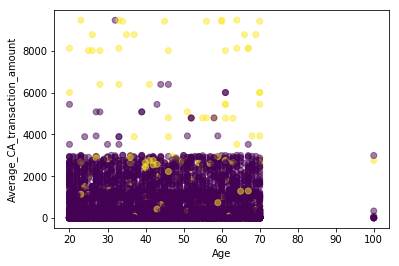

In [39]:
#Visualising the data in form of number of cases in each class(Loan Flag)
plt.scatter(ready_data['Age'], ready_data['Average_CA_transaction_amount'],
            alpha=0.5, c=ready_data["Loan Flag"], cmap='viridis', label = np.unique(ready_data["Loan Flag"]))
plt.xlabel("Age")
plt.ylabel("Average_CA_transaction_amount")

In [40]:
#This is a biased datatset, therefore, need to apply over sampling for balancing the classes

In [41]:
#Applying oversampling technique using Synthetic Minority Oversampling Technique
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_new, y_new = oversample.fit_sample(X, y)

/Users/swathikiran/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/Users/swathikiran/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/Users/swathikiran/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality di

In [42]:
X_new.shape

(19578, 9)

Text(0,0.5,'Average_CA_transaction_amount')

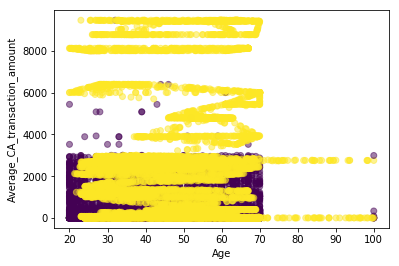

In [43]:
#Visualising the the classes after over sampling the minority class"""
plt.scatter(X_new[:,0], X_new[:,1],
            alpha=0.5, c=y_new, cmap='viridis', label = np.unique(ready_data["Loan Flag"]))
plt.xlabel("Age")
plt.ylabel("Average_CA_transaction_amount")

In [44]:
y_new.shape

(19578,)

In [45]:
#Applying ststs model to identify the impacting variables after balancing the classes
import statsmodels.api as sm
logit_model=sm.Logit(y_new,X_new)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.097505
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.859    
Dependent Variable: y                AIC:              3835.9031
Date:               2020-04-10 16:09 BIC:              3906.8426
No. Observations:   19578            Log-Likelihood:   -1909.0  
Df Model:           8                LL-Null:          -13570.  
Df Residuals:       19569            LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     9.0000                                      
------------------------------------------------------------------
      Coef.     Std.Err.      z       P>|z|     [0.025     0.975] 
------------------------------------------------------------------
x1     0.0243     0.0031     7.8006   0.0000     0.0182     0.0303
x2     0.0019     0.0000    41.0095   0.0000     0.0018     0.0020
x3 

<h2>Modelling</h2>

In [46]:
#Independent variables after oversampling
X_new.shape

(19578, 9)

In [47]:
#Dependent variables after oversampling
y_new.shape

(19578,)

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=0)

In [49]:
#Using Logistic Regression Classifer

from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_train, y_train)
y_pred = logistic_regressor.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic_regressor.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.97
[[2820  107]
 [  79 2868]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2927
           1       0.96      0.97      0.97      2947

    accuracy                           0.97      5874
   macro avg       0.97      0.97      0.97      5874
weighted avg       0.97      0.97      0.97      5874



/Users/swathikiran/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [50]:
#Using Decision Tree Classifer

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dt.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy of Decision Tree classifier on test set: 0.99
[[2899   28]
 [   9 2938]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2927
           1       0.99      1.00      0.99      2947

    accuracy                           0.99      5874
   macro avg       0.99      0.99      0.99      5874
weighted avg       0.99      0.99      0.99      5874



In [51]:
#Using KNN Classifer

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy of Knn classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of Knn classifier on test set: 0.97
[[2797  130]
 [  18 2929]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2927
           1       0.96      0.99      0.98      2947

    accuracy                           0.97      5874
   macro avg       0.98      0.97      0.97      5874
weighted avg       0.98      0.97      0.97      5874



In [52]:
#Using Support Vector Classifer

from sklearn.svm import SVC
svm_classifier = SVC(gamma='auto')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
print('Accuracy of Support Vector classifier on test set: {:.2f}'.format(svm_classifier.score(X_test, y_test)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of Support Vector classifier on test set: 0.94
[[2896   31]
 [ 339 2608]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      2927
           1       0.99      0.88      0.93      2947

    accuracy                           0.94      5874
   macro avg       0.94      0.94      0.94      5874
weighted avg       0.94      0.94      0.94      5874



<h3>Decision Tree classifier gave the better scores</h3>

In [53]:
#Plotting the ROC Curve

In [54]:
#Need to reshape for applying the stats model
y_test = y_test.reshape(-1,1)
y_pred = y_pred.reshape(-1,1)

In [55]:
y_test.shape

(5874, 1)

In [56]:
y_pred.shape

(5874, 1)

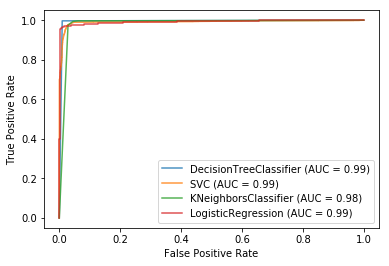

In [57]:
from sklearn.metrics import plot_roc_curve
ax = plt.gca()
rfc_disp = plot_roc_curve(dt, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(svm_classifier, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(knn, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp = plot_roc_curve(logistic_regressor, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

<h2>Training the entire dataset for final Classifier</h2>

In [58]:
#Training Final classifier with full data, to predict the new test set provided

In [59]:
#Getting the testset data ready for testing

In [60]:
test_df = pd.read_csv("Test_Sample/test_mergedData.csv",encoding='latin1')

In [61]:
test_df.head()

,Client ID,Age,Gender,County,Income Group,Average amount of CA transaction,# Products in bank,Held Loan previously,Num Transactions,Last TXN Amount,Merchant Code,Last Transaction Narrative
0,10001,59,1,Cork,10001 - 40000,22,4,0,2,12.59,7375,MYWHEELS IE DUBLIN 2
1,10002,27,1,Kerry,10001 - 40000,11,4,0,0,30.00,7531,MAXOL/MACE BRENNAN'S NEWBRIDGE
2,10003,58,0,Louth,10001 - 40000,9,2,0,28,1003.01,5533,Finglas Autoparts Limit Dublin
3,10004,45,1,Dublin,60001 - 100000,34,2,0,31,873.25,3692,DOUBLETREE CHELSEA
4,10005,21,0,Dublin,40001 - 60000,38,1,0,12,926.75,3659,TAJ HOTELS INTERNATIONAL Aurangabad


In [62]:
test_df.drop(['Last TXN Amount','Merchant Code','Last Transaction Narrative'], axis =1, inplace=True)
test_df.drop(['Gender','County', '# Products in bank'], axis =1, inplace=True)

In [63]:
test_df.head()

,Client ID,Age,Income Group,Average amount of CA transaction,Held Loan previously,Num Transactions
0,10001,59,10001 - 40000,22,0,2
1,10002,27,10001 - 40000,11,0,0
2,10003,58,10001 - 40000,9,0,28
3,10004,45,60001 - 100000,34,0,31
4,10005,21,40001 - 60000,38,0,12


In [64]:
#Creating the dummy variables for the county column
dummy_variables = pd.get_dummies(test_df['Income Group'])
test_df = pd.concat([test_df,dummy_variables], axis=1)

In [65]:
test_df.drop('Income Group', axis =1, inplace=True)

In [66]:
test_df.head()

,Client ID,Age,Average amount of CA transaction,Held Loan previously,Num Transactions,0 - 10000,100000+,10001 - 40000,40001 - 60000,60001 - 100000
0,10001,59,22,0,2,0,0,1,0,0
1,10002,27,11,0,0,0,0,1,0,0
2,10003,58,9,0,28,0,0,1,0,0
3,10004,45,34,0,31,0,0,0,0,1
4,10005,21,38,0,12,0,0,0,1,0


In [67]:
test_df.shape

(2000, 10)

In [68]:
#Assigning the indepedent variables to the final test set
X_testset = test_df.iloc[:, 1:10 ].values

In [69]:
X_testset[0]

array([59, 22,  0,  2,  0,  0,  1,  0,  0])

In [70]:
#Independent variables from the full data (inclusive synthetic data)
X_new.shape

(19578, 9)

In [71]:
y_new.shape

(19578,)

<h3>Using Logistic Regression for prediction as we need to estimate the Maximum likelihood as well</h3>

In [72]:
#Using Logistic Regression Classifer as final predictor

from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression()
logistic_regressor.fit(X_new, y_new)
loan_flag_pred = logistic_regressor.predict(X_testset)

/Users/swathikiran/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [73]:
#Calculating the probabilities of each entry being in class 0 or class 1
loan_probabilities = logistic_regressor.predict_proba(X_testset)

In [74]:
#Creating new dataframe to store the results
likelihood_calculation = pd.DataFrame(data = loan_probabilities[0:,0:], columns = {"probability_of_1","probability_of_0"})

In [75]:
#Adding predictions to the new dataframe
likelihood_calculation["predicted_Loan_flag"] = loan_flag_pred

In [76]:
likelihood_calculation.describe()

,probability_of_1,probability_of_0,predicted_Loan_flag
count,2000.000000,2000.000000,2000.000000
mean,0.873142,0.126858,0.111500
std,0.267636,0.267636,0.314829
min,0.000092,0.000028,0.000000
25%,0.943115,0.000559,0.000000
50%,0.994954,0.005046,0.000000
75%,0.999441,0.056885,0.000000
max,0.999972,0.999908,1.000000


In [77]:
#Number of outcomes for each class(0 or 1)
likelihood_calculation['predicted_Loan_flag'].value_counts()

0    1777
1     223
Name: predicted_Loan_flag, dtype: int64

In [78]:
likelihood_calculation.head()

,probability_of_1,probability_of_0,predicted_Loan_flag
0,0.999885,0.000115,0
1,0.999959,0.000041,0
2,0.998482,0.001518,0
3,0.999011,0.000989,0
4,0.999880,0.000120,0


In [79]:
#Adding client ID to the new dataframe for reference
likelihood_calculation ["Client ID"] = test_df ["Client ID"]

In [80]:
#Rearranging the dataframe
likelihood_calculation = likelihood_calculation[["Client ID","predicted_Loan_flag","probability_of_1" ]]

In [81]:
#Multiplyong the probablity with 100 for percentage
likelihood_calculation["probability_of_1"] = likelihood_calculation["probability_of_1"]*100

In [82]:
likelihood_calculation.head()

,Client ID,predicted_Loan_flag,probability_of_1
0,10001,0,99.988540
1,10002,0,99.995851
2,10003,0,99.848227
3,10004,0,99.901085
4,10005,0,99.988016


In [83]:
likelihood_calculation.describe()

,Client ID,predicted_Loan_flag,probability_of_1
count,2000.000000,2000.000000,2000.000000
mean,11000.500000,0.111500,87.314183
std,577.494589,0.314829,26.763593
min,10001.000000,0.000000,0.009214
25%,10500.750000,0.000000,94.311535
50%,11000.500000,0.000000,99.495405
75%,11500.250000,0.000000,99.944100
max,12000.000000,1.000000,99.997218


In [84]:
#calculating the Bins for likelihood calculation
bins = [0,5, 10,40,60, 100]
likelihood_calculation['Bins'] = pd.cut(likelihood_calculation['probability_of_1'], bins)

In [85]:
#Number of elements for each Bin
likelihood_calculation.groupby("Bins").count()

,Client ID,predicted_Loan_flag,probability_of_1
Bins,,,
"(0, 5]",74,74,74
"(5, 10]",33,33,33
"(10, 40]",79,79,79
"(40, 60]",71,71,71
"(60, 100]",1743,1743,1743


In [86]:
#Creating a column for describing the likelihood
for val in likelihood_calculation["probability_of_1"]:
    if val <= 5:
        likelihood_calculation["Likelihood"] = "Very Low Likelihood"
    elif 5 < val <= 10:
        likelihood_calculation["Likelihood"] = "Low Likelihood"
    elif 10 < val <= 40:
        likelihood_calculation["Likelihood"] = "Medium Likelihood"
    elif 40 < val <= 60:
        likelihood_calculation["Likelihood"] = "High Likelihood"
    else:
        likelihood_calculation["Likelihood"] = "Very High Likelihood"
        

In [87]:
likelihood_calculation.head()

,Client ID,predicted_Loan_flag,probability_of_1,Bins,Likelihood
0,10001,0,99.988540,"(60, 100]",Very High Likelihood
1,10002,0,99.995851,"(60, 100]",Very High Likelihood
2,10003,0,99.848227,"(60, 100]",Very High Likelihood
3,10004,0,99.901085,"(60, 100]",Very High Likelihood
4,10005,0,99.988016,"(60, 100]",Very High Likelihood


In [88]:
#Removing the Bins Column
likelihood_calculation.drop(["Bins"], axis =1, inplace= True)

In [89]:
#Preview of the predicted values
likelihood_calculation.head()

,Client ID,predicted_Loan_flag,probability_of_1,Likelihood
0,10001,0,99.988540,Very High Likelihood
1,10002,0,99.995851,Very High Likelihood
2,10003,0,99.848227,Very High Likelihood
3,10004,0,99.901085,Very High Likelihood
4,10005,0,99.988016,Very High Likelihood


In [90]:
#Saving the predicted results
likelihood_calculation.to_csv("Test_Sample/predicted_Loan_Flag_results.csv", index = False)